# Main Research Areas and Investigators

> [Mestrado e Doutorado em Ciências da Saúde](https://ensino.einstein.br/mestrado-doutorado/pt-br)

> Programa _Strictu Sensu_ Einstein 

> 2022

> 



In [4]:
import pandas as pd
import tabula

## Data
Retrieve tabular data in pdf, and store it in a dataframe.m


In [6]:
df = tabula.read_pdf('edital.pdf', pages='all')[1]
df.rename({'Linha de pesquisa':'LinhaPesquisa','Link Currículo Lattes':'Lattes'},inplace=True)
df.head()

,Docente,Linha de pesquisa,E-mail,Link Currículo Lattes
0,Marcelino De Souza Durao Junior,Medicina Crítica,marcelino.junior@einstein.br,http://lattes.cnpq.br/2520100158218531
1,Marcelo Passos Teivelis,Envelhecimento,marcelo.teivelis@einstein.br,http://lattes.cnpq.br/3054761913682159
2,Mario Lenza,Envelhecimento,mario.lenza@einstein.br,http://lattes.cnpq.br/5788521527100081
3,Moisés Cohen,Envelhecimento,m.cohen@uol.com.br;,http://lattes.cnpq.br/6174355233304675
4,Nelson Hamerschlak,Medicina Molecular,hamer@einstein.br,http://lattes.cnpq.br/6838231541739860


In [7]:
df.tail()

,Docente,Linha de pesquisa,E-mail,Link Currículo Lattes
16,Sérgio Eduardo Alonso Araújo,Envelhecimento,sergio.araujo@einstein.br,http://lattes.cnpq.br/3226965570401282
17,Sérgio Podgaec,Medicina Molecular,sergio.podgaec@einstein.br,http://lattes.cnpq.br/8610641646795768
18,Thiago Domingos Correa,Medicina Crítica,thiago.correa@einstein.br,http://lattes.cnpq.br/7355330306578276
19,Welbert De Oliveira Pereira,Medicina Molecular,welbert.pereira@einstein.br,http://lattes.cnpq.br/3590811502731830
20,Yuri Longatto Boteon,Medicina Crítica,yuri.boteon@einstein.br,http://lattes.cnpq.br/4952815451313867


# Network Visualization 
## Creat Nodes
Create two types of nodes ("Docente" and "LinhaPesquisa").

In [9]:
docentes = df[['Docente']].assign(color='red',type='Docente',size=10).set_index('Docente').to_dict('index')
linhas = df[['Linha de pesquisa']].assign(color='tab:blue',type='LinhaPesquisa',size=30).drop_duplicates().set_index('Linha de pesquisa').to_dict('index')
nodes = {**docentes,   **linhas}

## Create Edges
Group investigators by research area.

In [10]:
edges = list(zip(df['Docente'], df['Linha de pesquisa']))

## Create graph using NetworkX

In [11]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(n for n in nodes.items())
g.add_edges_from(((u, v) for u, v in edges))

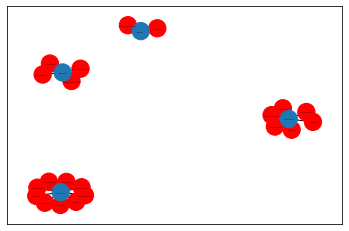

In [15]:
base_options = dict(with_labels=True)
node_colors = [d["color"] for _, d in g.nodes(data=True)]
# nx.draw_networkx(g, node_color=node_colors, **base_options,font_size=1)
nx.draw_networkx(g, node_color=node_colors, **base_options,font_size=1)

## Add networkx graph (g) to pyvis to become interactive.

In [16]:
from pyvis.network import Network

net=Network('95%','100%',heading='<h2>Pós-Graduação em Ciências da Saúde</><h3>Docentes <em>Stricto Sensus</em> 2021</h3>')
net.set_options(''' var options = {
    "edges": {"smooth": {"type": "continuous","roundness": 0.45}},
    "physics": { "barnesHut": { "springConstant": 0.035}}
    }''')
    
net.from_nx(g)
net.show('net.html')


AssertionError: 